In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv ("placement.csv")
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [3]:
#preprocessing
data['status']= data['status'].map({'Placed':1,'Not Placed':0})
data['workex']= data['workex'].map({'Yes':1,'No':0})
data['gender']= data['gender'].map({'M':1,'F':0})
data['hsc_b']= data['hsc_b'].map({'Central':1,'Others':0})
data['ssc_b']= data['ssc_b'].map({'Central':1,'Others':0})
data['degree_t']= data['degree_t'].map({'Sci&Tech':0,'Comm&Mgmt':1,'Others':2})
data['specialisation']= data['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})
data['hsc_s']= data['hsc_s'].map({'Commerce':0,'Science':1,'Arts':2})

In [4]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,0,58.00,0,0,55.0,1,58.80,1
1,1,79.33,1,78.33,0,1,77.48,0,1,86.5,0,66.28,1
2,1,65.00,1,68.00,1,2,64.00,1,0,75.0,0,57.80,1
3,1,56.00,1,52.00,1,1,52.00,0,0,66.0,1,59.43,0
4,1,85.80,1,73.60,1,0,73.30,1,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,0,77.60,1,0,91.0,0,74.49,1
211,1,58.00,0,60.00,0,1,72.00,0,0,74.0,0,53.62,1
212,1,67.00,0,67.00,0,0,73.00,1,1,59.0,0,69.72,1
213,0,74.00,0,66.00,0,0,58.00,1,0,70.0,1,60.23,1


In [5]:
#apply SVM Classifier
attributes = np.column_stack([data.gender, data.ssc_p, data.ssc_b, data.hsc_p, data.hsc_b, data.hsc_s, data.degree_p,
       data.degree_t, data.workex, data.etest_p, data.specialisation, data.mba_p])

In [6]:
attributes

array([[ 1.  , 67.  ,  0.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  1.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  1.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  0.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  0.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  1.  , ..., 89.  ,  1.  , 60.22]])

In [7]:
#data splitting
X_train, X_test, Y_train, Y_test = train_test_split(attributes, data.status, test_size=0.2,random_state=47) 

In [8]:
#Kernel Type = Radial basis function (RBF), gamma=0.6
from sklearn.svm import SVC
rbf = SVC(kernel='rbf', gamma = 0.6, random_state = 27)
rbf.fit(X_train,Y_train)

SVC(gamma=0.6, random_state=27)

In [9]:
Y_pred = rbf.predict(X_test)

In [10]:
accuracy = np.mean(Y_pred == Y_test)
print("\nAccuracy for Kernal 'RBF', gamma=0.6: ", accuracy)


Accuracy for Kernal 'RBF', gamma=0.6:  0.6976744186046512


In [11]:
from sklearn.metrics import confusion_matrix
cm_rbf = confusion_matrix(Y_test,Y_pred)
cm_rbf

array([[ 0, 13],
       [ 0, 30]])

In [12]:
#Kernel Type = Linear
X_train, X_test, Y_train, Y_test = train_test_split(attributes, data.status, test_size=0.2,random_state=98) 
linear = SVC(kernel='linear', random_state = 25)
linear.fit(X_train,Y_train)

SVC(kernel='linear', random_state=25)

In [13]:
Y_pred = linear.predict(X_test)

In [14]:
accuracy = np.mean(Y_pred == Y_test)
print("\nAccuracy for Kernal 'linear': ", accuracy)


Accuracy for Kernal 'linear':  0.813953488372093


In [15]:
from sklearn.metrics import confusion_matrix
cm_rbf = confusion_matrix(Y_test,Y_pred)
cm_rbf

array([[ 7,  7],
       [ 1, 28]])

In [21]:
#visualization
att = np.column_stack([data.workex, data.etest_p])

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(att, data.status, test_size=0.2,random_state=98) 
cla1 = SVC(kernel='rbf', gamma = 0.6, random_state = 27)
cla1.fit(X_train,Y_train)
Y_pred = cla1.predict(X_test)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(att, data.status, test_size=0.2,random_state=98) 
cla2 = SVC(kernel='linear', random_state = 25)
cla2.fit(X_train,Y_train)
Y_pred = cla2.predict(X_test)

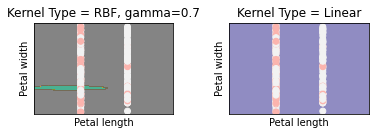

In [24]:
import matplotlib.pyplot as plt
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# title for the plots
titles = ['Kernel Type = RBF, gamma=0.7','Kernel Type = Linear']


for i, clf in enumerate((cla1, cla2)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Dark2, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Pastel1)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()